## Импорты

In [1]:
import os
import matplotlib.pyplot as plt
from pathlib import Path
import shutil
import torch
import gc

## Анализ данных

In [2]:
directory = r'datasets\train\labels'

# List to store the first numbers from all rows and files
temp = {}
freq = {}
first_numbers = []

# Loop through all files in the directory
for filename in os.listdir(directory):
    if filename.endswith(".txt"):
        filepath = os.path.join(directory, filename)
        
        # Open and read the file
        with open(filepath, 'r') as file:
            if os.stat(filepath).st_size == 0:
                first_number = '10'
                freq[first_number] = freq.get(first_number, 0) + 1
                first_numbers.append(first_number)
            else:
                for line in file:
                    # Split the line into columns
                    columns = line.split()

                    # Extract the first number and add it to the list
                    if columns:
                        first_number = columns[0]
                        freq[first_number] = freq.get(first_number, 0) + 1
                        first_numbers.append(first_number)
            temp[filename] = first_numbers
            first_numbers = []

In [3]:
temp

{'100000000.txt': ['5', '0', '0'],
 '100000001.txt': ['5'],
 '100000002.txt': ['7', '0'],
 '100000003.txt': ['0', '0'],
 '100000004.txt': ['6', '0'],
 '100000005.txt': ['6', '0', '0', '0', '0'],
 '100000006.txt': ['1', '1', '0', '0'],
 '100000007.txt': ['0', '0', '0', '0'],
 '100000008.txt': ['6', '1', '1'],
 '100000009.txt': ['6', '6', '1', '1', '0'],
 '100000010.txt': ['0'],
 '100000011.txt': ['6', '6', '5', '0'],
 '100000012.txt': ['5', '1', '0', '0'],
 '100000013.txt': ['6', '5', '0'],
 '100000014.txt': ['5', '0'],
 '100000015.txt': ['6', '6', '5'],
 '100000016.txt': ['5', '5'],
 '100000017.txt': ['6', '5', '1', '0'],
 '100000018.txt': ['5'],
 '100000019.txt': ['5'],
 '100000020.txt': ['6', '5'],
 '100000021.txt': ['6', '5', '1', '0', '0', '0'],
 '100000022.txt': ['10'],
 '100000023.txt': ['0', '0'],
 '100000024.txt': ['10'],
 '100000032.txt': ['0', '0'],
 '100000033.txt': ['3', '0'],
 '100000034.txt': ['3', '0'],
 '100000035.txt': ['1', '1', '1'],
 '100000036.txt': ['0', '0'],
 '1

In [10]:
len(temp)

20276

## Частота встречаемости классов

In [4]:
freq

{'5': 1075,
 '0': 21224,
 '7': 1181,
 '6': 3455,
 '1': 11985,
 '10': 1992,
 '3': 2276,
 '2': 503,
 '4': 2169,
 '8': 96,
 '9': 10}

<BarContainer object of 11 artists>

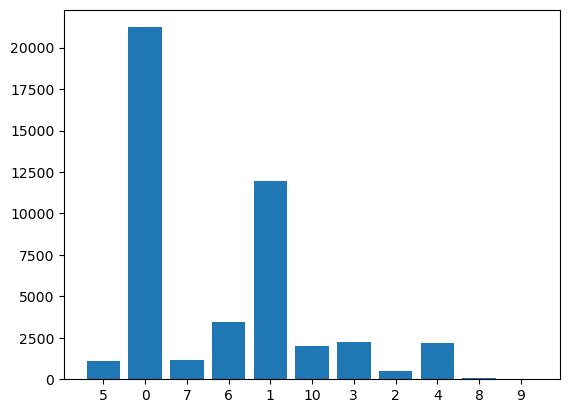

In [5]:
plt.bar(freq.keys(), freq.values())

## Распределение по количесвту объектов на одном снимке

(array([1.3252e+04, 3.8320e+03, 2.6350e+03, 3.2700e+02, 1.6600e+02,
        2.9000e+01, 2.2000e+01, 4.0000e+00, 5.0000e+00, 4.0000e+00]),
 array([ 1. ,  2.5,  4. ,  5.5,  7. ,  8.5, 10. , 11.5, 13. , 14.5, 16. ]),
 <BarContainer object of 10 artists>)

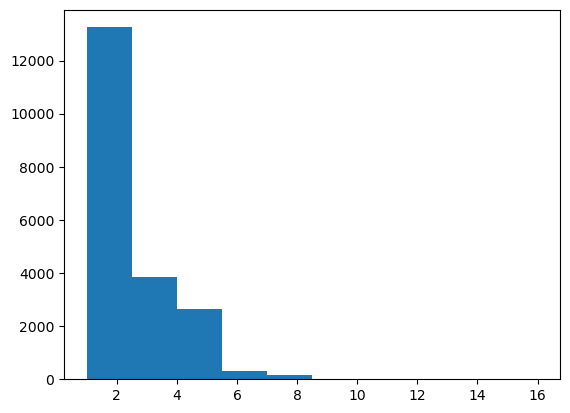

In [6]:
plt.hist([len(temp[_]) for _ in temp])

## Количество сэмплов с одним объектом класса и их распределение по классам

In [7]:
len([_ for _ in temp if len(temp[_])==1])

7210

In [8]:
from collections import Counter
Counter([temp[_][0] for _ in temp if len(temp[_])==1])

Counter({'0': 2243,
         '10': 1992,
         '1': 1775,
         '3': 331,
         '7': 296,
         '6': 230,
         '4': 182,
         '5': 101,
         '2': 53,
         '8': 7})

## Обработка и деление на выборки

In [14]:
temp_with_one_item = [_ for _ in temp if len(temp[_])==1]
temp_with_many_items = [_ for _ in temp if len(temp[_]) > 1]

In [15]:
temp_with_many_items

['100000000.txt',
 '100000002.txt',
 '100000003.txt',
 '100000004.txt',
 '100000005.txt',
 '100000006.txt',
 '100000007.txt',
 '100000008.txt',
 '100000009.txt',
 '100000011.txt',
 '100000012.txt',
 '100000013.txt',
 '100000014.txt',
 '100000015.txt',
 '100000016.txt',
 '100000017.txt',
 '100000020.txt',
 '100000021.txt',
 '100000023.txt',
 '100000032.txt',
 '100000033.txt',
 '100000034.txt',
 '100000035.txt',
 '100000036.txt',
 '100000037.txt',
 '100000039.txt',
 '100000040.txt',
 '100000041.txt',
 '100000042.txt',
 '100000043.txt',
 '100000044.txt',
 '100000045.txt',
 '100000046.txt',
 '100000047.txt',
 '100000048.txt',
 '100000049.txt',
 '100000051.txt',
 '100000053.txt',
 '100000054.txt',
 '100000056.txt',
 '100000057.txt',
 '100000059.txt',
 '100000060.txt',
 '100000061.txt',
 '100000062.txt',
 '100000069.txt',
 '100000071.txt',
 '100000073.txt',
 '100000074.txt',
 '100000076.txt',
 '100000077.txt',
 '100000079.txt',
 '100000080.txt',
 '100000083.txt',
 '100000084.txt',
 '10010000

In [11]:
temp_0 = [_ for _ in temp_with_one_item if temp[_][0]=='0']
temp_1 = [_ for _ in temp_with_one_item if temp[_][0]=='1']
temp_2 = [_ for _ in temp_with_one_item if temp[_][0]=='2']
temp_3 = [_ for _ in temp_with_one_item if temp[_][0]=='3']
temp_4 = [_ for _ in temp_with_one_item if temp[_][0]=='4']
temp_5 = [_ for _ in temp_with_one_item if temp[_][0]=='5']
temp_6 = [_ for _ in temp_with_one_item if temp[_][0]=='6']
temp_7 = [_ for _ in temp_with_one_item if temp[_][0]=='7']
temp_8 = [_ for _ in temp_with_one_item if temp[_][0]=='8']
temp_9 = [_ for _ in temp_with_one_item if temp[_][0]=='9']
temp_10 = [_ for _ in temp_with_one_item if temp[_][0]=='10']
#all_temps = [temp_0, temp_1, temp_2, temp_3, temp_4, temp_5, temp_6, temp_7, temp_8, temp_10]
all_temps = [temp_0, temp_1, temp_2, temp_3, temp_4, temp_5, temp_6, temp_7, temp_8, temp_9, temp_10]
#all_temps = [temp_0, temp_1, temp_2, temp_3, temp_4, temp_5, temp_6, temp_7, temp_10]

In [12]:
def split_data(data, perc1, perc2): # (массив с файлами одного класса, доля тренировочной выборки)
    # Создание директорий 
    Path("datasets\split_dir").mkdir(exist_ok=True)
    Path("datasets\split_dir\\labels\\train").mkdir(parents=True, exist_ok=True)
    Path("datasets\split_dir\\labels\\test").mkdir(parents=True, exist_ok=True)
    Path("datasets\split_dir\\labels\\val").mkdir(parents=True, exist_ok=True)
    Path("datasets\split_dir\\images\\train").mkdir(parents=True, exist_ok=True)
    Path("datasets\split_dir\\images\\test").mkdir(parents=True, exist_ok=True)
    Path("datasets\split_dir\\images\\val").mkdir(parents=True, exist_ok=True)
    # Заполнение тренировочной выборки
    for i in range(int(len(data)*perc1)):
        shutil.copy(r"datasets\train\labels\\" + data[i], "datasets\split_dir\\labels\\train")
        shutil.copy(r"datasets\train\images\\" + Path(data[i]).stem + '.jpeg', "datasets\split_dir\\images\\train")
    # Заполнение тестовой выборки
    for i in range(int(len(data)*perc1), int(len(data)*(perc1 + perc2))):
        shutil.copy(r"datasets\train\labels\\" + data[i], "datasets\split_dir\\labels\\test")
        shutil.copy(r"datasets\train\images\\" + Path(data[i]).stem + '.jpeg', "datasets\split_dir\\images\\test")
    # Заполнение валидирующей выборки
    for i in range(int(len(data)*(perc1 + perc2)), len(data)):
        shutil.copy(r"datasets\train\labels\\" + data[i], "datasets\split_dir\\labels\\val")
        shutil.copy(r"datasets\train\images\\" + Path(data[i]).stem + '.jpeg', "datasets\split_dir\\images\\val")

In [14]:
def split_data(data, perc1): # (массив с файлами одного класса, доля тренировочной выборки)
    # Создание директорий 
    Path("datasets\split_dir").mkdir(exist_ok=True)
    Path("datasets\split_dir\\labels\\train").mkdir(parents=True, exist_ok=True)
    Path("datasets\split_dir\\labels\\test").mkdir(parents=True, exist_ok=True)
    Path("datasets\split_dir\\labels\\val").mkdir(parents=True, exist_ok=True)
    Path("datasets\split_dir\\images\\train").mkdir(parents=True, exist_ok=True)
    Path("datasets\split_dir\\images\\test").mkdir(parents=True, exist_ok=True)
    Path("datasets\split_dir\\images\\val").mkdir(parents=True, exist_ok=True)
    # Заполнение тренировочной выборки
    for i in range(int(len(data)*perc1)):
        shutil.copy(r"datasets\train\labels\\" + data[i], "datasets\split_dir\\labels\\train")
        shutil.copy(r"datasets\train\images\\" + Path(data[i]).stem + '.jpeg', "datasets\split_dir\\images\\train")
    # Заполнение тестовой выборки
    for i in range(int(len(data)*perc1), len(data)):
        shutil.copy(r"datasets\train\labels\\" + data[i], "datasets\split_dir\\labels\\test")
        shutil.copy(r"datasets\train\images\\" + Path(data[i]).stem + '.jpeg', "datasets\split_dir\\images\\test")
    for i in temp_with_many_items:
        shutil.copy(r"datasets\train\labels\\" + i, "datasets\split_dir\\labels\\val")
        shutil.copy(r"datasets\train\images\\" + Path(i).stem + '.jpeg', "datasets\split_dir\\images\\val")

In [15]:
a, b = 0.8, 0.2
for item in all_temps:
    split_data(item, a)

In [30]:
len(list(temp.keys()))

20276

## Простое деление

In [33]:
Path("datasets\split_dir").mkdir(exist_ok=True)
Path("datasets\split_dir\\labels\\train").mkdir(parents=True, exist_ok=True)
Path("datasets\split_dir\\labels\\test").mkdir(parents=True, exist_ok=True)
Path("datasets\split_dir\\labels\\val").mkdir(parents=True, exist_ok=True)
Path("datasets\split_dir\\images\\train").mkdir(parents=True, exist_ok=True)
Path("datasets\split_dir\\images\\test").mkdir(parents=True, exist_ok=True)
Path("datasets\split_dir\\images\\val").mkdir(parents=True, exist_ok=True)
for i in range(20000):
    shutil.copy(r"datasets\train\labels\\" + list(temp.keys())[i], "datasets\split_dir\\labels\\train")
    shutil.copy(r"datasets\train\images\\" + Path(list(temp.keys())[i]).stem + '.jpeg', "datasets\split_dir\\images\\train")
for i in range(20001, 20275):
    shutil.copy(r"datasets\train\labels\\" + list(temp.keys())[i], "datasets\split_dir\\labels\\val")
    shutil.copy(r"datasets\train\images\\" + Path(list(temp.keys())[i]).stem + '.jpeg', "datasets\split_dir\\images\\val")


## Модель

In [34]:
torch.cuda.empty_cache()

In [36]:
from ultralytics import YOLO

model = YOLO('yolov8n.pt')

#так тоже можно если дообучать по своим предыдущим результатам
#model = YOLO('C:/Users/Gromwud/runs/detect/train3/weights/best.pt')

#ссылка на yaml и через запятую гиперпараметры - с ними и экспериментируем
results = model.train(data='C:/Users/Gromwud/datasets/data.yaml', optimizer='RMSProp', lr0=0.00001, epochs=200, imgsz=640, batch=16)

Ultralytics YOLOv8.2.76  Python-3.9.18 torch-2.4.0 CUDA:0 (NVIDIA GeForce RTX 4070, 12282MiB)
engine\trainer: task=detect, mode=train, model=yolov8n.pt, data=C:/Users/Gromwud/datasets/data.yaml, epochs=200, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=RMSProp, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, 

train: Scanning C:\Users\Gromwud\datasets\split_dir\labels\train.cache... 20000 images, 1969 backgrounds, 0 corrupt: 100%|██████████| 20000/20000 [00:00<?, ?it/s]
val: Scanning C:\Users\Gromwud\datasets\split_dir\labels\val.cache... 275 images, 23 backgrounds, 0 corrupt: 100%|██████████| 275/275 [00:00<?, ?it/s]


Plotting labels to runs\detect\train2\labels.jpg... 
optimizer: RMSprop(lr=1e-05, momentum=0.937) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs\detect\train2
Starting training for 200 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/200       2.3G      2.322      2.579      1.594         58        640: 100%|██████████| 1250/1250 [01:50<00:00, 11.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  8.99it/s]

                   all        275        638      0.531      0.121      0.117     0.0334



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/200      2.14G       2.05      1.874       1.39         44        640: 100%|██████████| 1250/1250 [01:43<00:00, 12.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00,  9.98it/s]

                   all        275        638      0.713      0.228      0.217     0.0841



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/200      2.12G      1.912      1.582      1.307         77        640: 100%|██████████| 1250/1250 [01:39<00:00, 12.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00,  9.33it/s]

                   all        275        638      0.444       0.39      0.319      0.152



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/200      2.14G      1.831      1.444      1.266         50        640: 100%|██████████| 1250/1250 [01:38<00:00, 12.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 10.65it/s]

                   all        275        638      0.358      0.518      0.343      0.154



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/200      2.18G      1.776      1.365      1.236         69        640: 100%|██████████| 1250/1250 [01:39<00:00, 12.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00,  9.74it/s]

                   all        275        638      0.451      0.418      0.307       0.12



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/200      2.13G      1.736       1.32      1.217         56        640: 100%|██████████| 1250/1250 [01:39<00:00, 12.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 10.73it/s]

                   all        275        638      0.365      0.444      0.366      0.185



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/200      2.14G      1.718      1.277      1.209         50        640: 100%|██████████| 1250/1250 [01:38<00:00, 12.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 10.23it/s]

                   all        275        638      0.533      0.455      0.375      0.192



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/200      2.12G      1.702      1.255      1.201         67        640: 100%|██████████| 1250/1250 [01:39<00:00, 12.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 10.47it/s]

                   all        275        638      0.377      0.546      0.393      0.184



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/200      2.13G      1.683      1.233      1.189         62        640: 100%|██████████| 1250/1250 [01:38<00:00, 12.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00,  9.81it/s]

                   all        275        638      0.532      0.513      0.402      0.177



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/200      2.13G      1.678       1.22      1.188         68        640: 100%|██████████| 1250/1250 [01:40<00:00, 12.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 11.00it/s]

                   all        275        638       0.46      0.493       0.44      0.228



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/200      2.17G      1.662      1.212      1.186         75        640: 100%|██████████| 1250/1250 [01:39<00:00, 12.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 11.21it/s]

                   all        275        638      0.582      0.482      0.392      0.168



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/200      2.18G      1.646      1.196      1.178         79        640: 100%|██████████| 1250/1250 [01:39<00:00, 12.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00,  9.99it/s]

                   all        275        638      0.526      0.542      0.461      0.218



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/200      2.14G       1.65      1.183      1.174         50        640: 100%|██████████| 1250/1250 [01:39<00:00, 12.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 10.64it/s]

                   all        275        638      0.672       0.51      0.459      0.223



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/200      2.18G      1.635      1.177      1.172         70        640: 100%|██████████| 1250/1250 [01:39<00:00, 12.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 10.66it/s]

                   all        275        638      0.617      0.547       0.42      0.189



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/200      2.13G      1.631      1.166      1.167         60        640: 100%|██████████| 1250/1250 [01:39<00:00, 12.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 11.03it/s]

                   all        275        638      0.403      0.622      0.451       0.19



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/200      2.13G      1.624      1.161      1.166         92        640: 100%|██████████| 1250/1250 [01:36<00:00, 12.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 11.94it/s]

                   all        275        638      0.677      0.484      0.487       0.24



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/200      2.17G      1.617      1.153      1.162         57        640: 100%|██████████| 1250/1250 [01:35<00:00, 13.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 10.48it/s]

                   all        275        638      0.623      0.573      0.492      0.239



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/200      2.18G      1.609      1.136      1.158         70        640: 100%|██████████| 1250/1250 [01:37<00:00, 12.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 10.69it/s]

                   all        275        638      0.663      0.529      0.513      0.263



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/200      2.13G      1.608      1.137      1.161         64        640: 100%|██████████| 1250/1250 [01:37<00:00, 12.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 10.61it/s]

                   all        275        638      0.671       0.47      0.518      0.256



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/200      2.13G      1.605      1.133      1.159         65        640: 100%|██████████| 1250/1250 [01:36<00:00, 12.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 11.24it/s]

                   all        275        638      0.665       0.59      0.528      0.251



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/200      2.13G      1.604      1.121      1.153         73        640: 100%|██████████| 1250/1250 [01:38<00:00, 12.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 10.90it/s]

                   all        275        638      0.502      0.572      0.534      0.267



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/200      2.13G      1.594      1.115      1.152         59        640: 100%|██████████| 1250/1250 [01:37<00:00, 12.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 11.18it/s]

                   all        275        638      0.697      0.586      0.546      0.266



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/200      2.12G      1.597      1.112       1.15         72        640: 100%|██████████| 1250/1250 [01:36<00:00, 12.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 10.54it/s]

                   all        275        638      0.726      0.584      0.561      0.284



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/200      2.14G      1.594       1.11       1.15         71        640: 100%|██████████| 1250/1250 [01:37<00:00, 12.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 10.70it/s]

                   all        275        638       0.63      0.586      0.543      0.274



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/200      2.14G      1.588      1.114      1.149         67        640: 100%|██████████| 1250/1250 [01:36<00:00, 12.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 11.07it/s]

                   all        275        638      0.671      0.611      0.553      0.265



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/200      2.12G       1.59      1.103      1.147         63        640: 100%|██████████| 1250/1250 [01:35<00:00, 13.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 11.41it/s]

                   all        275        638      0.513      0.654      0.571      0.279



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/200      2.13G      1.581      1.102      1.145         72        640: 100%|██████████| 1250/1250 [01:36<00:00, 12.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 10.69it/s]

                   all        275        638      0.645      0.654      0.565      0.283



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/200      2.18G      1.575      1.094      1.144         67        640: 100%|██████████| 1250/1250 [01:36<00:00, 12.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 11.36it/s]

                   all        275        638      0.708      0.617      0.572      0.275



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/200      2.12G      1.572      1.092      1.143         67        640: 100%|██████████| 1250/1250 [01:37<00:00, 12.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 10.87it/s]

                   all        275        638      0.676      0.648      0.593      0.305



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/200      2.14G      1.573      1.084      1.142         71        640: 100%|██████████| 1250/1250 [01:36<00:00, 12.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 11.31it/s]

                   all        275        638      0.646      0.656      0.574       0.29



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/200      2.13G       1.57      1.083      1.142         74        640: 100%|██████████| 1250/1250 [01:35<00:00, 13.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 11.35it/s]

                   all        275        638      0.642      0.633      0.554      0.283



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/200       2.2G       1.57      1.081      1.142         61        640: 100%|██████████| 1250/1250 [01:36<00:00, 12.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 10.45it/s]

                   all        275        638      0.649      0.666      0.577      0.293



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/200      2.13G       1.57      1.076      1.137         79        640: 100%|██████████| 1250/1250 [01:37<00:00, 12.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 10.48it/s]

                   all        275        638      0.684      0.621      0.572      0.285



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/200      2.17G      1.565      1.073      1.139         66        640: 100%|██████████| 1250/1250 [01:36<00:00, 13.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 11.48it/s]

                   all        275        638      0.662      0.654      0.583      0.292



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/200      2.13G      1.562      1.072      1.136         67        640: 100%|██████████| 1250/1250 [01:36<00:00, 12.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 11.28it/s]

                   all        275        638      0.673      0.652      0.587      0.294



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/200      2.12G      1.559      1.068      1.139         67        640: 100%|██████████| 1250/1250 [01:36<00:00, 12.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 11.45it/s]

                   all        275        638      0.656      0.655      0.585      0.293



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/200      2.14G      1.559      1.063      1.137         41        640: 100%|██████████| 1250/1250 [01:37<00:00, 12.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 10.38it/s]

                   all        275        638      0.682      0.626      0.592      0.299



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/200      2.13G      1.556      1.062      1.135         72        640: 100%|██████████| 1250/1250 [01:36<00:00, 12.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 10.49it/s]

                   all        275        638      0.655      0.659      0.587        0.3



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/200      2.17G      1.556      1.058      1.138         62        640: 100%|██████████| 1250/1250 [01:37<00:00, 12.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 11.57it/s]

                   all        275        638      0.658      0.656      0.588      0.304



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/200      2.17G      1.549      1.055      1.133         61        640: 100%|██████████| 1250/1250 [01:36<00:00, 12.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 10.07it/s]

                   all        275        638      0.657      0.669      0.591      0.305



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/200      2.12G      1.552      1.046      1.132         77        640: 100%|██████████| 1250/1250 [01:36<00:00, 12.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 11.17it/s]

                   all        275        638      0.661      0.666      0.597      0.306



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/200      2.13G      1.548      1.051      1.129         70        640: 100%|██████████| 1250/1250 [01:37<00:00, 12.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 11.02it/s]

                   all        275        638      0.737       0.62      0.605       0.31



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/200      2.13G      1.549      1.054      1.132         74        640: 100%|██████████| 1250/1250 [01:36<00:00, 12.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 10.79it/s]

                   all        275        638      0.695      0.645      0.608       0.31



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/200      2.13G      1.543      1.049       1.13         59        640: 100%|██████████| 1250/1250 [01:36<00:00, 12.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 10.69it/s]

                   all        275        638      0.663      0.683      0.603      0.312



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/200      2.14G      1.539      1.039      1.127         75        640: 100%|██████████| 1250/1250 [01:36<00:00, 12.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 11.02it/s]

                   all        275        638        0.7      0.645      0.609      0.312



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/200      2.19G      1.543      1.047      1.127         69        640: 100%|██████████| 1250/1250 [01:36<00:00, 13.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00,  9.97it/s]

                   all        275        638      0.698      0.639      0.609      0.312



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/200      2.12G      1.542      1.044      1.127         55        640: 100%|██████████| 1250/1250 [01:36<00:00, 12.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 11.15it/s]

                   all        275        638        0.7      0.625      0.609      0.312



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/200      2.18G      1.539      1.043      1.129         88        640: 100%|██████████| 1250/1250 [01:36<00:00, 12.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 10.68it/s]

                   all        275        638      0.707      0.627      0.608      0.311



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/200      2.13G      1.541      1.038      1.128         60        640: 100%|██████████| 1250/1250 [01:37<00:00, 12.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 10.22it/s]

                   all        275        638       0.71      0.636      0.606      0.311



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/200      2.13G      1.533      1.035      1.127         82        640: 100%|██████████| 1250/1250 [01:37<00:00, 12.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 11.48it/s]

                   all        275        638      0.693      0.638      0.607       0.31



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/200      2.18G      1.542      1.038       1.13         68        640: 100%|██████████| 1250/1250 [01:36<00:00, 12.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 10.65it/s]

                   all        275        638      0.682      0.637      0.606      0.313



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/200      2.18G      1.537      1.032      1.128         41        640: 100%|██████████| 1250/1250 [01:36<00:00, 12.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 10.66it/s]

                   all        275        638      0.686      0.669      0.609      0.313



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/200      2.13G      1.535      1.035      1.126         37        640: 100%|██████████| 1250/1250 [01:36<00:00, 12.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 10.50it/s]

                   all        275        638      0.686      0.678      0.611      0.313



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/200      2.13G      1.531      1.027      1.128         66        640: 100%|██████████| 1250/1250 [01:36<00:00, 13.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 10.78it/s]

                   all        275        638      0.687       0.68      0.609      0.314



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/200      2.17G      1.529      1.025      1.125         83        640: 100%|██████████| 1250/1250 [01:37<00:00, 12.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 10.26it/s]

                   all        275        638      0.693      0.635      0.609      0.313



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/200      2.17G      1.538      1.032      1.127         66        640: 100%|██████████| 1250/1250 [01:36<00:00, 12.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 10.95it/s]

                   all        275        638      0.714       0.65      0.613      0.314



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/200      2.14G      1.528       1.03      1.126         40        640: 100%|██████████| 1250/1250 [01:36<00:00, 12.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 10.36it/s]

                   all        275        638      0.708      0.652      0.614      0.315



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/200      2.18G      1.524      1.022      1.123         49        640: 100%|██████████| 1250/1250 [01:36<00:00, 12.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 10.94it/s]

                   all        275        638      0.712      0.653      0.613      0.315



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/200      2.14G      1.526      1.023      1.123         62        640: 100%|██████████| 1250/1250 [01:36<00:00, 12.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 11.63it/s]

                   all        275        638      0.704      0.643      0.614      0.314



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/200      2.13G      1.522      1.023       1.12         59        640: 100%|██████████| 1250/1250 [01:36<00:00, 12.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 11.04it/s]

                   all        275        638      0.714      0.649      0.618      0.317



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/200      2.13G      1.527      1.023      1.124         61        640: 100%|██████████| 1250/1250 [01:36<00:00, 12.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 10.99it/s]

                   all        275        638      0.707      0.651      0.616      0.318



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/200      2.13G      1.531      1.019      1.125         59        640: 100%|██████████| 1250/1250 [01:37<00:00, 12.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 10.03it/s]

                   all        275        638      0.708      0.649      0.618      0.317



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/200      2.13G      1.529      1.018      1.126         67        640: 100%|██████████| 1250/1250 [01:37<00:00, 12.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 11.26it/s]

                   all        275        638      0.701      0.651      0.619      0.317



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/200      2.13G      1.526      1.012      1.122         73        640: 100%|██████████| 1250/1250 [01:37<00:00, 12.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 10.75it/s]

                   all        275        638      0.704      0.646      0.619      0.317



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/200      2.13G      1.524      1.011      1.124         72        640: 100%|██████████| 1250/1250 [01:37<00:00, 12.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 11.12it/s]

                   all        275        638      0.703      0.647       0.62      0.318



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/200      2.13G      1.519       1.02       1.12         72        640: 100%|██████████| 1250/1250 [01:37<00:00, 12.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 11.34it/s]

                   all        275        638      0.695      0.658      0.617      0.317



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/200      2.14G      1.519      1.012      1.119         72        640: 100%|██████████| 1250/1250 [01:37<00:00, 12.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 10.23it/s]

                   all        275        638      0.712      0.646      0.622      0.317



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/200      2.14G      1.517      1.018       1.12         63        640: 100%|██████████| 1250/1250 [01:37<00:00, 12.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 10.60it/s]

                   all        275        638      0.691      0.665      0.618      0.317



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/200      2.13G      1.515      1.008      1.119         61        640: 100%|██████████| 1250/1250 [01:37<00:00, 12.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 11.07it/s]

                   all        275        638      0.694      0.656      0.619      0.318



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/200      2.14G      1.517       1.01      1.117         61        640: 100%|██████████| 1250/1250 [01:37<00:00, 12.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 10.82it/s]

                   all        275        638      0.696      0.655      0.615      0.317



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/200      2.14G       1.51      1.005      1.117         59        640: 100%|██████████| 1250/1250 [01:38<00:00, 12.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00,  9.79it/s]

                   all        275        638      0.701      0.655      0.618       0.32



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/200      2.13G      1.518      1.011       1.12         76        640: 100%|██████████| 1250/1250 [01:36<00:00, 12.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 11.58it/s]

                   all        275        638      0.692      0.666      0.618      0.319



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/200      2.17G      1.516      1.003      1.118         73        640: 100%|██████████| 1250/1250 [01:37<00:00, 12.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 10.29it/s]

                   all        275        638      0.697      0.657      0.616      0.318



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/200      2.14G      1.516      1.011      1.118         71        640: 100%|██████████| 1250/1250 [01:37<00:00, 12.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 11.57it/s]

                   all        275        638      0.713      0.643      0.619      0.318



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/200      2.14G      1.512     0.9984      1.116         71        640: 100%|██████████| 1250/1250 [01:37<00:00, 12.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 10.59it/s]

                   all        275        638      0.699      0.668      0.615      0.317



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/200      2.14G      1.512      1.003      1.114         34        640: 100%|██████████| 1250/1250 [01:36<00:00, 12.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 10.91it/s]

                   all        275        638      0.723      0.642      0.621      0.321



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/200      2.18G       1.51      1.002      1.119         72        640: 100%|██████████| 1250/1250 [01:37<00:00, 12.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 10.44it/s]

                   all        275        638      0.739       0.64      0.622      0.321



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/200      2.12G      1.501     0.9954      1.114         46        640: 100%|██████████| 1250/1250 [01:37<00:00, 12.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 11.15it/s]

                   all        275        638      0.736      0.641       0.62      0.323



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/200      2.17G       1.51      1.001      1.117         74        640: 100%|██████████| 1250/1250 [01:37<00:00, 12.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 11.18it/s]

                   all        275        638      0.732       0.64       0.62      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/200      2.12G      1.515     0.9995      1.116         60        640: 100%|██████████| 1250/1250 [01:37<00:00, 12.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 10.70it/s]

                   all        275        638      0.736      0.642       0.62      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/200      2.12G      1.506      0.993      1.113         73        640: 100%|██████████| 1250/1250 [01:37<00:00, 12.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 11.73it/s]

                   all        275        638      0.736      0.641      0.621      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/200      2.14G        1.5     0.9917      1.115         62        640: 100%|██████████| 1250/1250 [01:36<00:00, 12.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 10.19it/s]

                   all        275        638      0.732      0.639      0.622      0.324



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/200      2.13G      1.502      1.001      1.113         85        640: 100%|██████████| 1250/1250 [01:37<00:00, 12.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 10.92it/s]

                   all        275        638       0.73       0.64      0.623      0.324



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/200      2.13G      1.505     0.9938      1.113         45        640: 100%|██████████| 1250/1250 [01:36<00:00, 12.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 11.21it/s]

                   all        275        638      0.726      0.637      0.621      0.321



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/200      2.13G      1.501     0.9979      1.112         68        640: 100%|██████████| 1250/1250 [01:36<00:00, 13.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 11.42it/s]

                   all        275        638      0.728      0.644      0.625      0.324



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/200      2.14G      1.498     0.9883      1.113         65        640: 100%|██████████| 1250/1250 [01:37<00:00, 12.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 11.17it/s]

                   all        275        638      0.725      0.642      0.625      0.326



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/200      2.13G      1.497     0.9866      1.112         68        640: 100%|██████████| 1250/1250 [01:36<00:00, 12.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 10.86it/s]

                   all        275        638      0.722      0.646      0.625      0.329



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/200      2.14G        1.5     0.9886      1.111         85        640: 100%|██████████| 1250/1250 [01:36<00:00, 12.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 11.24it/s]

                   all        275        638      0.716       0.65      0.624      0.329



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/200      2.14G      1.498     0.9851      1.112         64        640: 100%|██████████| 1250/1250 [01:36<00:00, 12.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 10.83it/s]

                   all        275        638      0.721      0.646      0.626      0.327



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/200      2.13G      1.499     0.9863      1.111         60        640: 100%|██████████| 1250/1250 [01:36<00:00, 12.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 10.92it/s]

                   all        275        638      0.721      0.647      0.626      0.325



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/200      2.13G      1.499     0.9879      1.113         68        640: 100%|██████████| 1250/1250 [01:36<00:00, 12.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 11.52it/s]

                   all        275        638      0.721      0.646      0.626      0.327



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/200      2.17G      1.495     0.9892       1.11         68        640: 100%|██████████| 1250/1250 [01:36<00:00, 12.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 11.35it/s]

                   all        275        638      0.721      0.645      0.626      0.327



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/200      2.12G      1.493     0.9851       1.11         69        640: 100%|██████████| 1250/1250 [01:36<00:00, 12.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 10.01it/s]

                   all        275        638      0.723      0.645      0.628      0.327



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/200      2.14G      1.497     0.9839      1.113         68        640: 100%|██████████| 1250/1250 [01:36<00:00, 12.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 10.69it/s]

                   all        275        638      0.725      0.645      0.626      0.323



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/200      2.14G      1.497     0.9791      1.107         81        640: 100%|██████████| 1250/1250 [01:37<00:00, 12.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 10.19it/s]

                   all        275        638      0.725      0.645      0.626      0.319



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/200      2.13G      1.495      0.985       1.11         78        640: 100%|██████████| 1250/1250 [01:37<00:00, 12.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 10.24it/s]

                   all        275        638      0.725      0.643      0.625      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/200      2.19G      1.496     0.9799      1.107         58        640: 100%|██████████| 1250/1250 [01:36<00:00, 12.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00,  9.94it/s]

                   all        275        638      0.724      0.643      0.626      0.319



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/200      2.12G      1.498     0.9796      1.112         66        640: 100%|██████████| 1250/1250 [01:37<00:00, 12.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 10.59it/s]

                   all        275        638      0.733      0.652      0.626      0.321



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/200      2.14G      1.489     0.9818      1.109         79        640: 100%|██████████| 1250/1250 [01:37<00:00, 12.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 11.07it/s]

                   all        275        638      0.733      0.651      0.627      0.324



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/200      2.13G      1.493     0.9767      1.107         77        640: 100%|██████████| 1250/1250 [01:36<00:00, 12.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 11.06it/s]

                   all        275        638      0.734      0.653      0.627      0.323



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/200      2.13G       1.49     0.9748      1.109         48        640: 100%|██████████| 1250/1250 [01:36<00:00, 12.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 11.54it/s]

                   all        275        638      0.733      0.654      0.628      0.324



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/200      2.13G      1.492     0.9764      1.111         53        640: 100%|██████████| 1250/1250 [01:37<00:00, 12.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 10.99it/s]

                   all        275        638       0.73      0.654      0.629      0.324



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/200       2.2G      1.488     0.9783      1.108         57        640: 100%|██████████| 1250/1250 [01:37<00:00, 12.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 10.60it/s]

                   all        275        638      0.732      0.654      0.629      0.318



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/200      2.18G      1.492     0.9812      1.109         60        640: 100%|██████████| 1250/1250 [01:36<00:00, 12.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00,  9.59it/s]

                   all        275        638       0.73      0.657      0.629      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/200      2.18G       1.49     0.9755      1.106         71        640: 100%|██████████| 1250/1250 [01:36<00:00, 12.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 10.17it/s]

                   all        275        638      0.738      0.653      0.629      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/200      2.18G      1.487     0.9777      1.107         71        640: 100%|██████████| 1250/1250 [01:36<00:00, 12.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 10.22it/s]

                   all        275        638      0.732      0.658      0.628      0.323



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/200      2.14G      1.491     0.9745      1.108         73        640: 100%|██████████| 1250/1250 [01:36<00:00, 12.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 10.71it/s]

                   all        275        638      0.742      0.651      0.629      0.324



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/200      2.13G      1.484     0.9728      1.105         59        640: 100%|██████████| 1250/1250 [01:36<00:00, 12.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 11.24it/s]

                   all        275        638      0.736      0.652      0.628      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/200      2.18G      1.482     0.9655      1.106         75        640: 100%|██████████| 1250/1250 [01:37<00:00, 12.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00,  9.93it/s]

                   all        275        638       0.74      0.651      0.629      0.325



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/200      2.14G      1.486     0.9739      1.108         51        640: 100%|██████████| 1250/1250 [01:36<00:00, 12.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 10.32it/s]

                   all        275        638      0.741       0.65      0.627      0.323



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/200      2.14G       1.49      0.974      1.106         50        640: 100%|██████████| 1250/1250 [01:36<00:00, 12.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 10.55it/s]

                   all        275        638      0.741      0.651      0.628      0.323



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/200      2.13G      1.486     0.9729      1.104         61        640: 100%|██████████| 1250/1250 [01:37<00:00, 12.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 11.69it/s]

                   all        275        638      0.739      0.654      0.629      0.325



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/200      2.19G      1.479     0.9653      1.103         67        640: 100%|██████████| 1250/1250 [01:36<00:00, 12.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 10.53it/s]

                   all        275        638      0.739      0.653      0.629      0.324



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/200      2.13G      1.483      0.968      1.104         67        640: 100%|██████████| 1250/1250 [01:37<00:00, 12.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 10.19it/s]

                   all        275        638      0.737      0.655      0.632      0.325



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/200      2.13G      1.482     0.9672      1.104         72        640: 100%|██████████| 1250/1250 [01:37<00:00, 12.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 11.04it/s]

                   all        275        638      0.736      0.656      0.632      0.326



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/200      2.13G      1.479     0.9675      1.103         62        640: 100%|██████████| 1250/1250 [01:36<00:00, 12.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00,  9.64it/s]

                   all        275        638      0.738      0.656      0.632      0.324



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/200      2.13G       1.48     0.9714      1.104         74        640: 100%|██████████| 1250/1250 [01:36<00:00, 12.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 10.78it/s]

                   all        275        638      0.739      0.653      0.633      0.323



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/200      2.13G      1.479      0.966      1.102         90        640: 100%|██████████| 1250/1250 [01:36<00:00, 12.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00,  9.66it/s]

                   all        275        638      0.741      0.653      0.633      0.324



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/200      2.13G      1.476     0.9663      1.103         51        640: 100%|██████████| 1250/1250 [01:37<00:00, 12.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 11.19it/s]

                   all        275        638      0.744       0.65      0.633      0.323



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/200      2.12G      1.473     0.9609        1.1         64        640: 100%|██████████| 1250/1250 [01:37<00:00, 12.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 10.90it/s]

                   all        275        638      0.745      0.656      0.634      0.323



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/200      2.14G      1.476     0.9621      1.101         69        640: 100%|██████████| 1250/1250 [01:36<00:00, 12.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 10.92it/s]

                   all        275        638      0.747      0.644      0.633      0.323



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/200      2.14G      1.474     0.9548        1.1         74        640: 100%|██████████| 1250/1250 [01:36<00:00, 12.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 11.48it/s]

                   all        275        638      0.749      0.654      0.633      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/200      2.14G      1.482     0.9642      1.106         73        640: 100%|██████████| 1250/1250 [01:37<00:00, 12.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 10.10it/s]

                   all        275        638      0.749      0.654      0.633       0.32



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/200      2.13G      1.478     0.9609      1.104         51        640: 100%|██████████| 1250/1250 [01:37<00:00, 12.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 10.90it/s]

                   all        275        638      0.747      0.653      0.632      0.321



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/200      2.14G      1.476       0.96      1.099         53        640: 100%|██████████| 1250/1250 [01:37<00:00, 12.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 11.26it/s]

                   all        275        638      0.746      0.648      0.629       0.32



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/200      2.13G      1.473     0.9572      1.101         73        640: 100%|██████████| 1250/1250 [01:36<00:00, 12.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 10.99it/s]

                   all        275        638      0.749       0.65       0.63      0.325



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/200      2.13G      1.475     0.9563        1.1         70        640: 100%|██████████| 1250/1250 [01:37<00:00, 12.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 10.88it/s]

                   all        275        638       0.75      0.652      0.632      0.323



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/200      2.13G       1.47      0.958        1.1         53        640: 100%|██████████| 1250/1250 [01:37<00:00, 12.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 11.11it/s]

                   all        275        638       0.75      0.649       0.63      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/200      2.13G      1.475     0.9563      1.099         59        640: 100%|██████████| 1250/1250 [01:36<00:00, 12.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 10.91it/s]

                   all        275        638       0.75      0.654      0.629      0.321



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/200      2.14G       1.47     0.9587      1.102         67        640: 100%|██████████| 1250/1250 [01:36<00:00, 12.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 10.49it/s]

                   all        275        638      0.751      0.654       0.63      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    131/200      2.13G       1.47     0.9546        1.1         68        640: 100%|██████████| 1250/1250 [01:36<00:00, 12.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 11.33it/s]

                   all        275        638       0.75      0.655       0.63      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    132/200      2.14G      1.472     0.9577      1.101         59        640: 100%|██████████| 1250/1250 [01:36<00:00, 12.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 10.75it/s]

                   all        275        638      0.746      0.652      0.631      0.321



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    133/200      2.17G      1.469     0.9529      1.098         62        640: 100%|██████████| 1250/1250 [01:36<00:00, 13.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 11.63it/s]

                   all        275        638      0.747      0.654      0.627      0.319



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    134/200      2.13G      1.474     0.9536      1.101         47        640: 100%|██████████| 1250/1250 [01:36<00:00, 12.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 11.73it/s]

                   all        275        638      0.748      0.657      0.632       0.32



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    135/200      2.13G      1.472     0.9483      1.103         72        640: 100%|██████████| 1250/1250 [01:36<00:00, 12.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 11.76it/s]

                   all        275        638      0.752       0.66      0.629       0.32



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    136/200      2.13G      1.472     0.9508      1.101         57        640: 100%|██████████| 1250/1250 [01:37<00:00, 12.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 10.92it/s]

                   all        275        638      0.752      0.658      0.628      0.319



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    137/200      2.13G      1.471     0.9477      1.103         51        640: 100%|██████████| 1250/1250 [01:36<00:00, 12.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 10.27it/s]

                   all        275        638      0.753      0.658      0.628       0.32



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    138/200       2.2G      1.471     0.9477      1.098         56        640: 100%|██████████| 1250/1250 [01:37<00:00, 12.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 10.18it/s]

                   all        275        638      0.752      0.658      0.629      0.317



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    139/200      2.18G      1.471     0.9532        1.1         72        640: 100%|██████████| 1250/1250 [01:36<00:00, 13.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 10.87it/s]

                   all        275        638      0.752      0.657      0.631      0.319



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    140/200      2.13G      1.474     0.9524      1.103         78        640: 100%|██████████| 1250/1250 [01:36<00:00, 12.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 10.78it/s]

                   all        275        638      0.752      0.653      0.634       0.32



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    141/200      2.18G       1.47     0.9529      1.101         73        640: 100%|██████████| 1250/1250 [01:36<00:00, 12.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 10.19it/s]

                   all        275        638      0.753      0.655      0.632      0.319



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    142/200      2.18G      1.472     0.9502      1.097         61        640: 100%|██████████| 1250/1250 [01:36<00:00, 12.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 11.44it/s]

                   all        275        638      0.748      0.648      0.634      0.318



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    143/200      2.17G       1.47     0.9467      1.097         57        640: 100%|██████████| 1250/1250 [01:37<00:00, 12.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 10.37it/s]

                   all        275        638      0.749      0.648      0.634      0.317



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    144/200      2.12G      1.464     0.9435      1.097         58        640: 100%|██████████| 1250/1250 [01:36<00:00, 12.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 11.32it/s]

                   all        275        638      0.747      0.649      0.635      0.318



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    145/200      2.13G      1.463     0.9421      1.094         78        640: 100%|██████████| 1250/1250 [01:36<00:00, 12.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 11.75it/s]

                   all        275        638      0.747      0.648      0.637      0.318



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    146/200      2.14G      1.462     0.9464      1.099         86        640: 100%|██████████| 1250/1250 [01:37<00:00, 12.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 10.69it/s]

                   all        275        638      0.741      0.641      0.634      0.318



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    147/200      2.12G      1.464     0.9487      1.099         55        640: 100%|██████████| 1250/1250 [01:36<00:00, 12.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 11.24it/s]

                   all        275        638      0.743      0.648      0.634      0.319



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    148/200      2.14G      1.463     0.9434      1.096         64        640: 100%|██████████| 1250/1250 [01:36<00:00, 12.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 10.70it/s]

                   all        275        638      0.742      0.645      0.634      0.318



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    149/200      2.14G      1.466     0.9455      1.098         80        640: 100%|██████████| 1250/1250 [01:37<00:00, 12.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 11.25it/s]

                   all        275        638      0.752      0.643      0.634      0.319



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    150/200      2.18G      1.461     0.9468      1.098         89        640: 100%|██████████| 1250/1250 [01:36<00:00, 12.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 10.69it/s]

                   all        275        638      0.747      0.647      0.635       0.32



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    151/200      2.13G      1.463     0.9437      1.098         77        640: 100%|██████████| 1250/1250 [01:36<00:00, 12.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 10.44it/s]

                   all        275        638      0.747      0.646      0.633      0.319



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    152/200      2.14G      1.463     0.9472      1.096         71        640: 100%|██████████| 1250/1250 [01:36<00:00, 12.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 10.99it/s]

                   all        275        638      0.743      0.647      0.635      0.319



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    153/200      2.14G      1.456     0.9409      1.094         53        640: 100%|██████████| 1250/1250 [01:36<00:00, 12.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 11.03it/s]

                   all        275        638      0.742       0.65      0.637       0.32



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    154/200      2.13G      1.462     0.9446      1.097         61        640: 100%|██████████| 1250/1250 [01:36<00:00, 12.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 10.16it/s]

                   all        275        638      0.739      0.648      0.635      0.318



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    155/200      2.14G      1.461     0.9401      1.097         53        640: 100%|██████████| 1250/1250 [01:36<00:00, 12.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 11.19it/s]

                   all        275        638      0.737      0.649      0.634      0.318



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    156/200      2.13G      1.461     0.9382      1.095         87        640: 100%|██████████| 1250/1250 [01:36<00:00, 12.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 11.45it/s]

                   all        275        638      0.743      0.648      0.636      0.318



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    157/200      2.18G      1.464     0.9469        1.1         69        640: 100%|██████████| 1250/1250 [01:36<00:00, 12.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00,  9.79it/s]

                   all        275        638      0.745      0.647      0.634      0.317



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    158/200      2.14G      1.464     0.9398        1.1         65        640: 100%|██████████| 1250/1250 [01:36<00:00, 12.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 11.04it/s]

                   all        275        638      0.741      0.648      0.637       0.32



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    159/200      2.13G      1.461     0.9388      1.095         53        640: 100%|██████████| 1250/1250 [01:36<00:00, 12.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 11.28it/s]

                   all        275        638      0.747      0.647      0.638       0.32



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    160/200      2.13G      1.459     0.9389      1.094         67        640: 100%|██████████| 1250/1250 [01:36<00:00, 12.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 10.44it/s]

                   all        275        638      0.745      0.648      0.637      0.321



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    161/200      2.13G      1.455     0.9356      1.095         55        640: 100%|██████████| 1250/1250 [01:36<00:00, 12.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 10.14it/s]

                   all        275        638      0.734      0.654      0.634      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    162/200      2.13G       1.46      0.939      1.096         55        640: 100%|██████████| 1250/1250 [01:36<00:00, 12.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 11.32it/s]

                   all        275        638      0.735       0.65      0.634      0.321



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    163/200      2.13G      1.459     0.9378      1.094         56        640: 100%|██████████| 1250/1250 [01:37<00:00, 12.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 10.82it/s]

                   all        275        638      0.737       0.66      0.634      0.319



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    164/200      2.13G      1.456     0.9363      1.093         58        640: 100%|██████████| 1250/1250 [01:37<00:00, 12.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 11.47it/s]

                   all        275        638      0.724      0.662      0.636      0.321



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    165/200       2.2G      1.454     0.9373      1.093         46        640: 100%|██████████| 1250/1250 [01:37<00:00, 12.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 11.26it/s]

                   all        275        638      0.736      0.664      0.636       0.32



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    166/200      2.13G      1.458     0.9366      1.095         69        640: 100%|██████████| 1250/1250 [01:36<00:00, 12.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 10.78it/s]

                   all        275        638      0.717      0.665      0.637      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    167/200      2.13G      1.454     0.9342      1.092         53        640: 100%|██████████| 1250/1250 [01:37<00:00, 12.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00,  9.84it/s]

                   all        275        638      0.717      0.662      0.635      0.319



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    168/200      2.13G      1.453     0.9344      1.094         71        640: 100%|██████████| 1250/1250 [01:36<00:00, 12.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 10.09it/s]

                   all        275        638      0.715      0.664      0.637       0.32



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    169/200      2.12G      1.452      0.931      1.094         67        640: 100%|██████████| 1250/1250 [01:36<00:00, 12.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 10.92it/s]

                   all        275        638      0.719      0.662      0.636      0.318



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    170/200      2.14G      1.452     0.9295      1.091         55        640: 100%|██████████| 1250/1250 [01:36<00:00, 12.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 10.14it/s]

                   all        275        638      0.717      0.663      0.632      0.313



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    171/200      2.12G      1.454     0.9283      1.093         72        640: 100%|██████████| 1250/1250 [01:36<00:00, 12.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 11.49it/s]

                   all        275        638      0.714      0.664      0.635      0.314



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    172/200      2.19G      1.455     0.9283      1.093         71        640: 100%|██████████| 1250/1250 [01:37<00:00, 12.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 11.12it/s]

                   all        275        638      0.714      0.664      0.634      0.314



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    173/200       2.2G      1.447     0.9245       1.09         69        640: 100%|██████████| 1250/1250 [01:36<00:00, 12.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00,  9.47it/s]

                   all        275        638      0.713      0.665      0.632      0.313



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    174/200      2.18G       1.45     0.9312      1.092         64        640: 100%|██████████| 1250/1250 [01:36<00:00, 12.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 11.49it/s]

                   all        275        638      0.715      0.666      0.634      0.315



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    175/200      2.13G      1.453     0.9275      1.093         60        640: 100%|██████████| 1250/1250 [01:37<00:00, 12.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 10.66it/s]

                   all        275        638      0.712      0.665      0.632      0.315



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    176/200      2.13G      1.452     0.9297      1.091         53        640: 100%|██████████| 1250/1250 [01:36<00:00, 12.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 11.12it/s]

                   all        275        638      0.711      0.667      0.632      0.313



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    177/200      2.18G      1.445     0.9227       1.09         49        640: 100%|██████████| 1250/1250 [01:37<00:00, 12.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 10.14it/s]

                   all        275        638      0.712      0.665      0.632      0.313



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    178/200      2.13G      1.453     0.9292       1.09         62        640: 100%|██████████| 1250/1250 [01:37<00:00, 12.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 11.29it/s]

                   all        275        638      0.713      0.664       0.63      0.312



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    179/200      2.13G      1.448     0.9264      1.091         87        640: 100%|██████████| 1250/1250 [01:37<00:00, 12.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 11.32it/s]

                   all        275        638      0.715      0.664      0.633      0.314



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    180/200      2.13G      1.447     0.9261      1.089         74        640: 100%|██████████| 1250/1250 [01:36<00:00, 12.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 11.10it/s]

                   all        275        638      0.715      0.665      0.633      0.314



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    181/200      2.14G      1.448     0.9259       1.09         66        640: 100%|██████████| 1250/1250 [01:37<00:00, 12.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 10.95it/s]

                   all        275        638      0.716      0.666      0.635      0.318



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    182/200      2.13G      1.448     0.9284      1.091         65        640: 100%|██████████| 1250/1250 [01:36<00:00, 12.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 10.75it/s]

                   all        275        638      0.717      0.665      0.633      0.319



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    183/200      2.19G      1.448      0.924      1.093         62        640: 100%|██████████| 1250/1250 [01:36<00:00, 12.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 11.07it/s]

                   all        275        638      0.713      0.661       0.63      0.319



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    184/200      2.19G      1.444     0.9203      1.088         79        640: 100%|██████████| 1250/1250 [01:37<00:00, 12.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 11.75it/s]

                   all        275        638       0.72      0.661      0.633      0.318



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    185/200      2.13G      1.449      0.927      1.092         43        640: 100%|██████████| 1250/1250 [01:36<00:00, 12.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 10.80it/s]

                   all        275        638      0.717      0.663       0.63      0.317



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    186/200      2.13G      1.442     0.9225      1.088         48        640: 100%|██████████| 1250/1250 [01:36<00:00, 12.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 10.64it/s]

                   all        275        638      0.717      0.664       0.63      0.316



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    187/200      2.14G      1.448     0.9222      1.091         70        640: 100%|██████████| 1250/1250 [01:37<00:00, 12.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:00<00:00, 10.61it/s]

                   all        275        638      0.718      0.664      0.629      0.314
EarlyStopping: Training stopped early as no improvement observed in last 100 epochs. Best results observed at epoch 87, best model saved as best.pt.
To update EarlyStopping(patience=100) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



187 epochs completed in 5.119 hours.
Optimizer stripped from runs\detect\train2\weights\last.pt, 6.2MB
Optimizer stripped from runs\detect\train2\weights\best.pt, 6.2MB

Validating runs\detect\train2\weights\best.pt...
Ultralytics YOLOv8.2.76  Python-3.9.18 torch-2.4.0 CUDA:0 (NVIDIA GeForce RTX 4070, 12282MiB)
Model summary (fused): 168 layers, 3,007,598 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<00:00,  7.98it/s]


                   all        275        638      0.723       0.64      0.623      0.328
             Live_Knot        190        328      0.856      0.814      0.891      0.394
             Dead_Knot        141        209       0.84      0.785      0.876      0.396
          Knot_missing          7          7      0.738      0.714      0.823      0.458
       knot_with_crack         13         15      0.419          1      0.764      0.511
                 Crack         14         16      0.372      0.778      0.366      0.219
             Quartzity          1          1          1          0          0          0
                 resin         47         62      0.839      0.387      0.643       0.32
Speed: 0.1ms preprocess, 0.4ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to runs\detect\train2
